In [1]:
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import numpy as np
import nltk

In [2]:
german_stop_words = stopwords.words('german')
german_stop_words.append("fur")

In [3]:
# CONSTANTS
DATA_PATH = "D:/10kgerdataset/"
TRAIN_CSV = "train.csv"
TEST_CSV = "test.csv"

In [4]:
try:
    df_train = pd.read_csv(os.path.join(DATA_PATH, TRAIN_CSV))
    df_test = pd.read_csv(os.path.join(DATA_PATH, TEST_CSV))
except FileNotFoundError:
    print("File was not found at specific location.")
    raise

In [5]:
df_train.shape, df_test.shape

((8221, 2), (2056, 2))

In [6]:
def remove_punctuation(document: str) -> str:
    return re.sub(r'[^\w\s]', '', document)

def remove_numbers(document: str) -> str:
    return re.sub(r'$\d+\W+|\b\d+\b|\W+\d+$', '', document)

def map_umlaut(document: str) -> str:
    umlaut_mapping = {
        "ß": "b",
        "ü": "u",
        "ä": "a",
        "ö": "o",
        "ë": "e",
    }
    for k, v in umlaut_mapping.items():
        document = document.replace(k, v)
    return document

def stop_word_removal(document: str) -> str:
    return " ".join(w for w in document.split() if w not in german_stop_words)

In [7]:
def run_pre_processing_pipeline(df):
    new_df = df.copy(deep=False)
    
    new_df["text"] = new_df["text"].str.lower()
    new_df["label"] = new_df["label"].str.lower()
    
    new_df = new_df.dropna()
    
    new_df["text"] = new_df["text"].apply(remove_punctuation)
    new_df["text"] = new_df["text"].apply(remove_numbers)
    new_df["text"] = new_df["text"].apply(map_umlaut)
    new_df["text"] = new_df["text"].apply(stop_word_removal)
    return new_df

In [8]:
df_train = run_pre_processing_pipeline(df_train)
df_test = run_pre_processing_pipeline(df_test)

# Data visualization

In [9]:
# class distribution
train_class_distribution = df_train["label"].value_counts()
test_class_distribution = df_test["label"].value_counts()

In [10]:
df_train_to_plot = pd.DataFrame({'label': train_class_distribution.index, 'count': train_class_distribution.values})
df_test_to_plot = pd.DataFrame({'label': test_class_distribution.index, 'count': test_class_distribution.values})

In [11]:
plt.style.use("dark_background")

__Number of samples per training and testing dataframe__

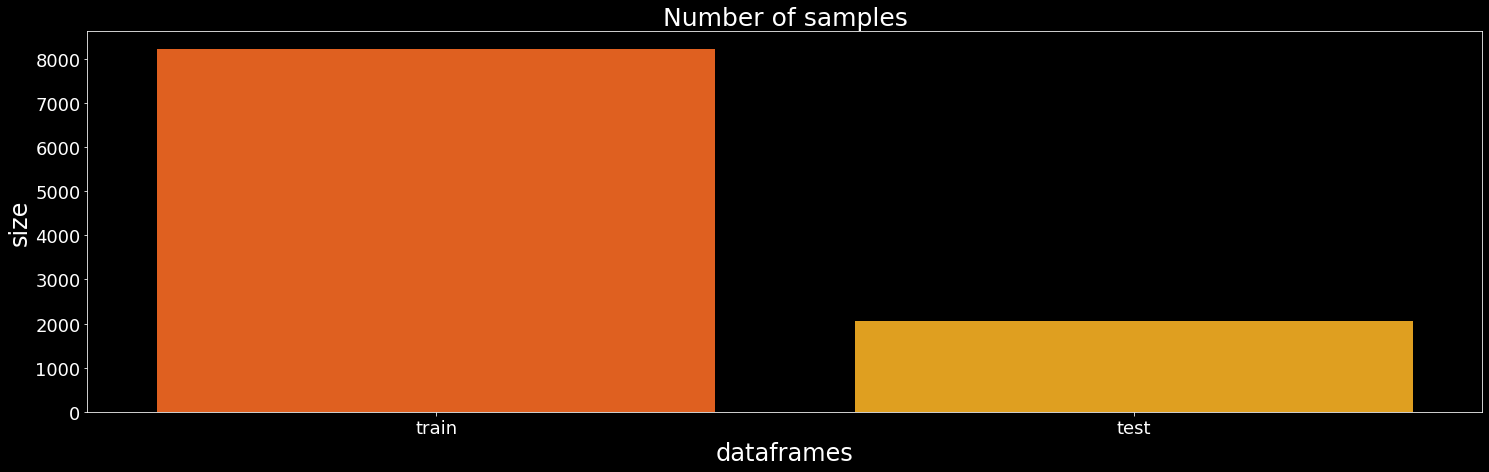

In [12]:
df_size = pd.DataFrame({'dataframes': ["train", "test"], 'size': [df_train.shape[0], df_test.shape[0]]})
fig_dims = (25, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Number of samples', fontsize=25)
plt.xlabel('label', fontsize=24)
plt.ylabel('count', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18) 
ax = sns.barplot(x="dataframes", y="size", data=df_size, palette=("autumn"))

__Training data distribution per class__

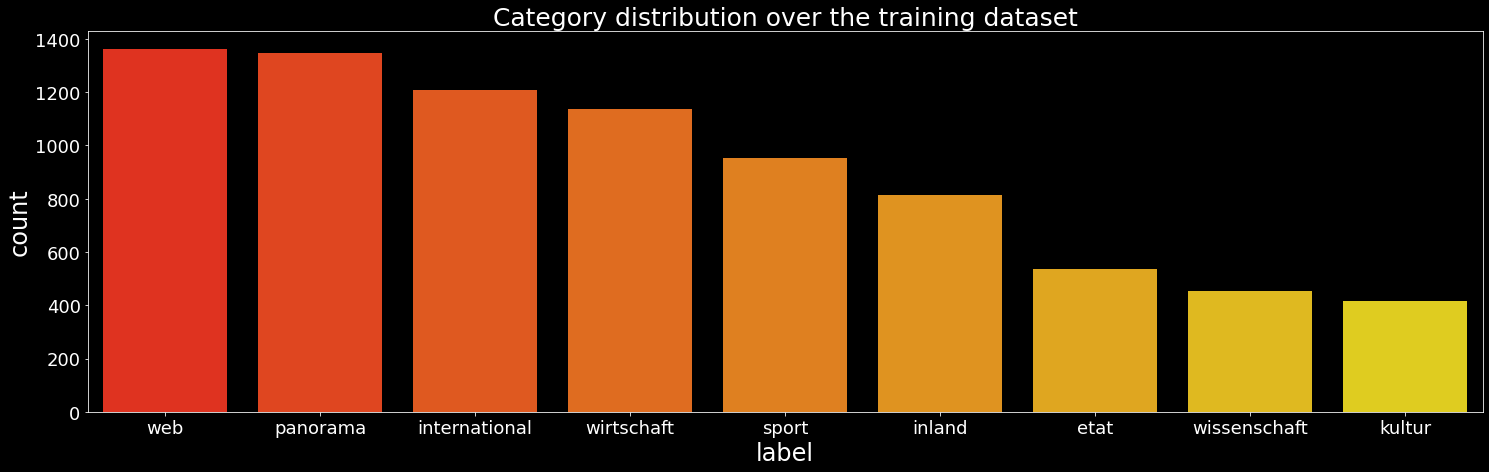

In [13]:
fig_dims = (25, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Category distribution over the training dataset', fontsize=25)
plt.xlabel('label', fontsize=24)
plt.ylabel('count', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18) 
ax = sns.barplot(x="label", y="count", data=df_train_to_plot, palette=("autumn"))

__Testing data distribution per class__

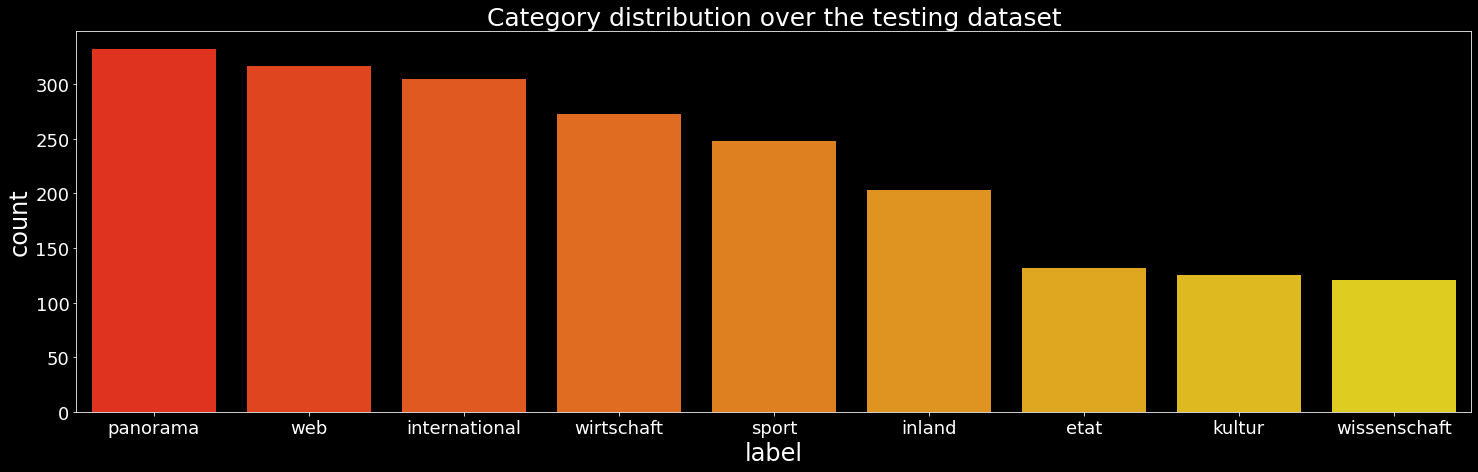

In [14]:
fig_dims = (25, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Category distribution over the testing dataset', fontsize=25)
plt.xlabel('label', fontsize=24)
plt.ylabel('count', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18) 
ax = sns.barplot(x="label", y="count", data=df_test_to_plot, palette=("autumn"))

In [15]:
seq_len_train = df_train["text"].apply(lambda x: len(x.split()))
seq_len_test = df_test["text"].apply(lambda x: len(x.split()))

__Train data sequence length density__

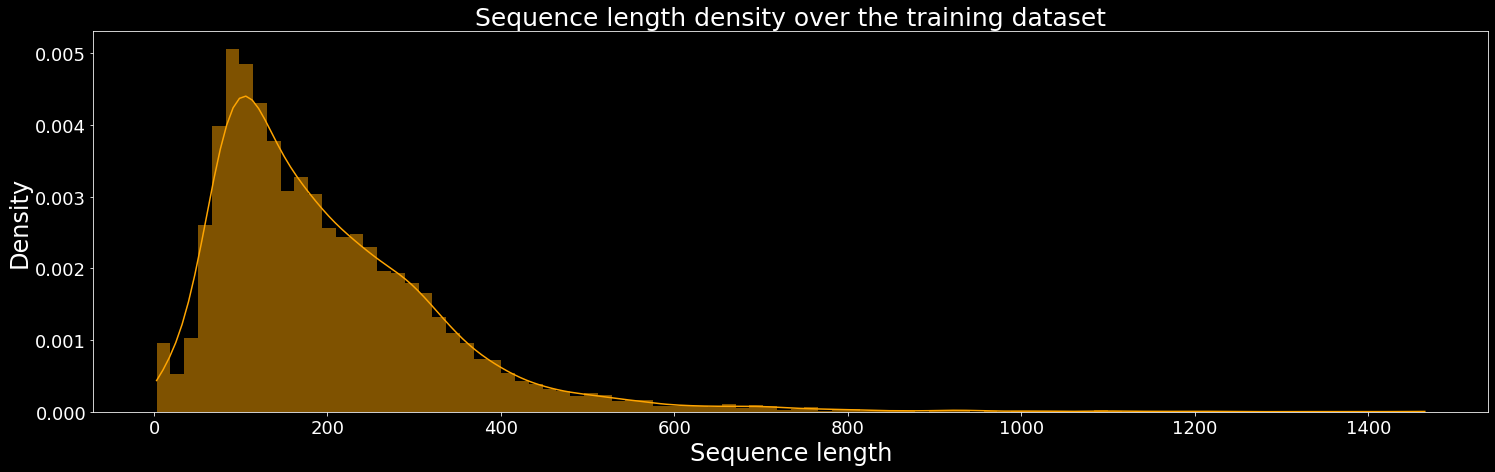

In [16]:
fig_dims = (25, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Sequence length density over the training dataset', fontsize=25)
plt.xlabel('Sequence length', fontsize=24)
plt.ylabel('Density', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18) 
ax = sns.histplot(seq_len_train, color="orange", label="100% Equities", kde=True, stat="density", linewidth=0)

__Test data sequence length density__

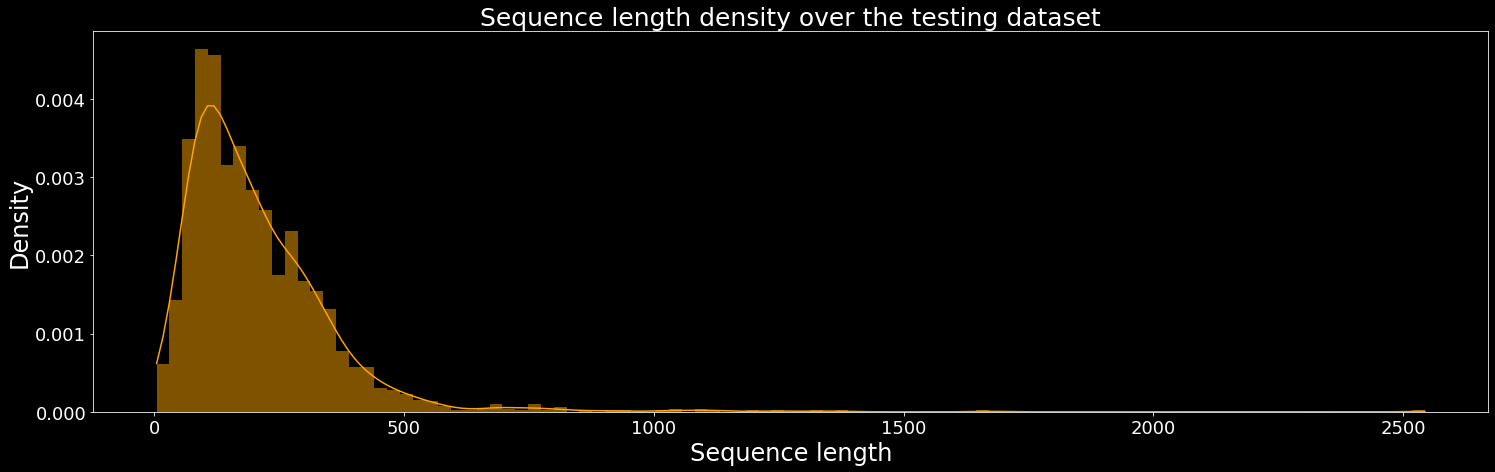

In [17]:
fig_dims = (25, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Sequence length density over the testing dataset', fontsize=25)
plt.xlabel('Sequence length', fontsize=24)
plt.ylabel('Density', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18) 
ax = sns.histplot(seq_len_test, color="orange", label="100% Equities", kde=True, stat="density", linewidth=0)

__Word frequency analysis__

In [18]:
train_word_freq = df_train.text.str.split(expand=True).stack().value_counts()
test_word_freq = df_test.text.str.split(expand=True).stack().value_counts()

In [19]:
train_top_10_words = pd.DataFrame({'words': train_word_freq[:10].index, 'count': train_word_freq[:10].values})
test_top_10_words = pd.DataFrame({'words': test_word_freq[:10].index, 'count': test_word_freq[:10].values})

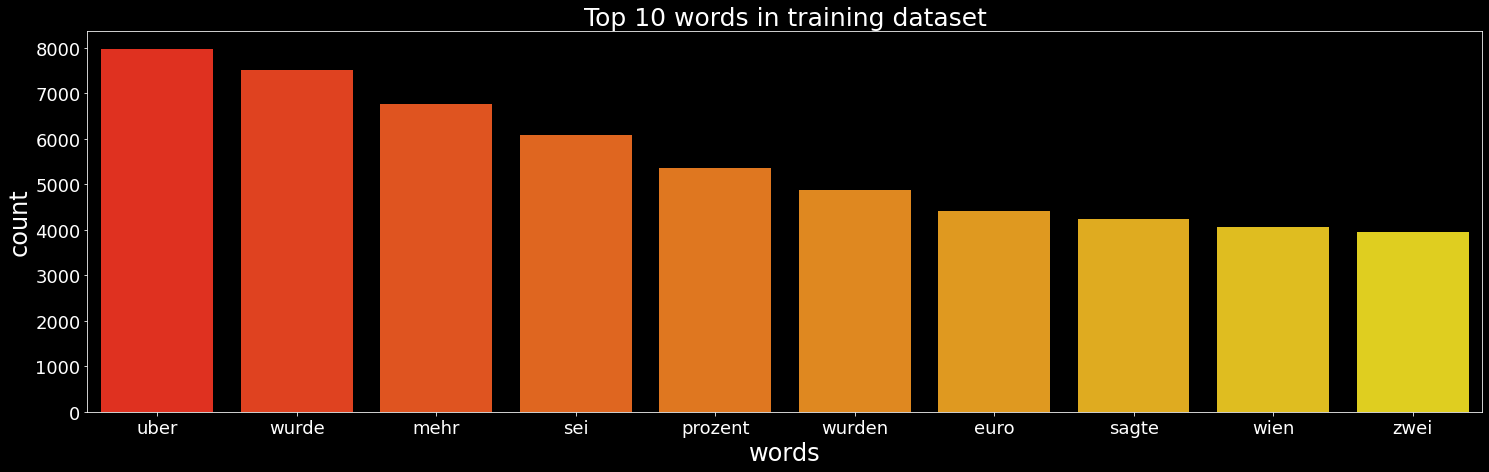

In [20]:
fig_dims = (25, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Top 10 words in training dataset', fontsize=25)
plt.xlabel('label', fontsize=24)
plt.ylabel('count', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18) 
ax = sns.barplot(x="words", y="count", data=train_top_10_words, palette=("autumn"))

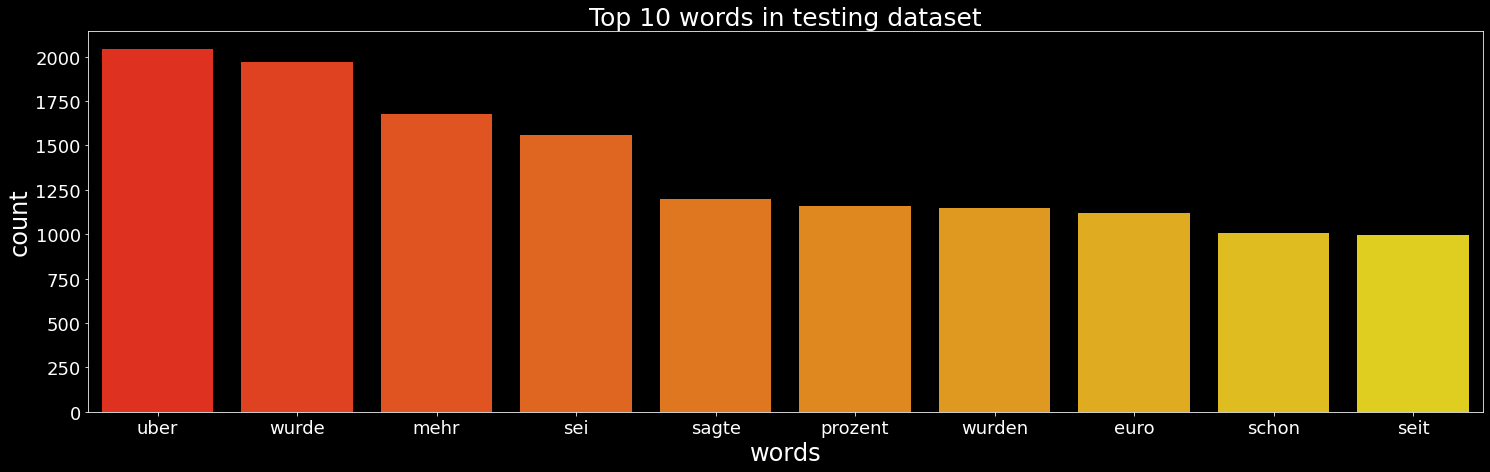

In [22]:
fig_dims = (25, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Top 10 words in testing dataset', fontsize=25)
plt.xlabel('label', fontsize=24)
plt.ylabel('count', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18) 
ax = sns.barplot(x="words", y="count", data=test_top_10_words, palette=("autumn"))

__Average word length analysis__

<AxesSubplot:title={'center':'Average word length distribution over the training dataset'}, xlabel='Average word length', ylabel='Count'>

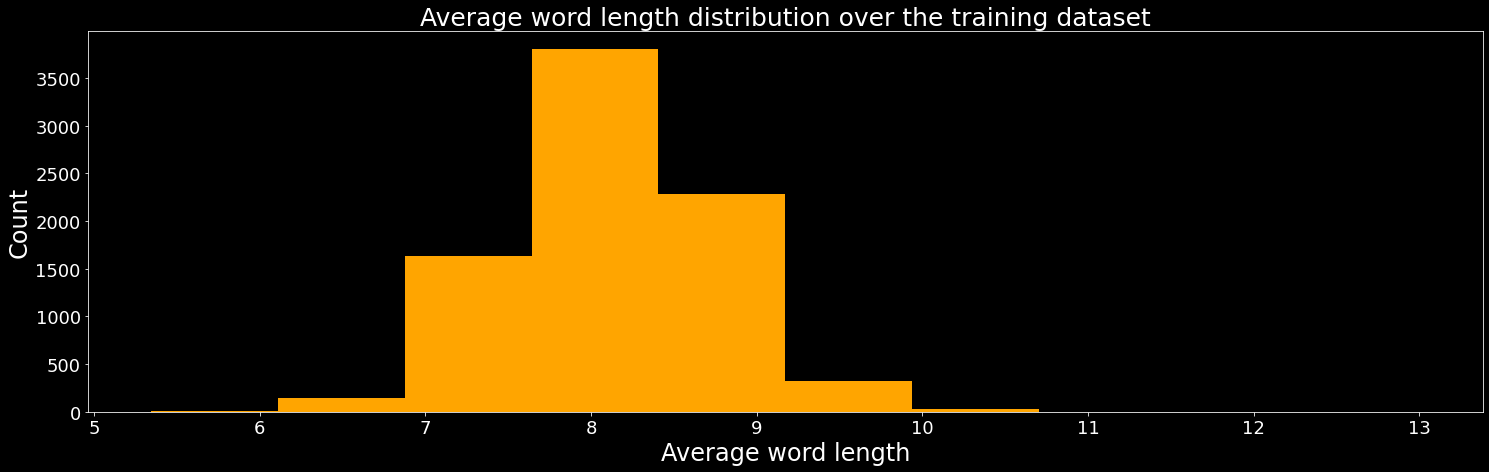

In [23]:
fig_dims = (25, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Average word length distribution over the training dataset', fontsize=25)
plt.xlabel('Average word length', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18) 
df_train['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(grid=False, color="orange")

<AxesSubplot:title={'center':'Average word length distribution over the testing dataset'}, xlabel='Average word length', ylabel='Count'>

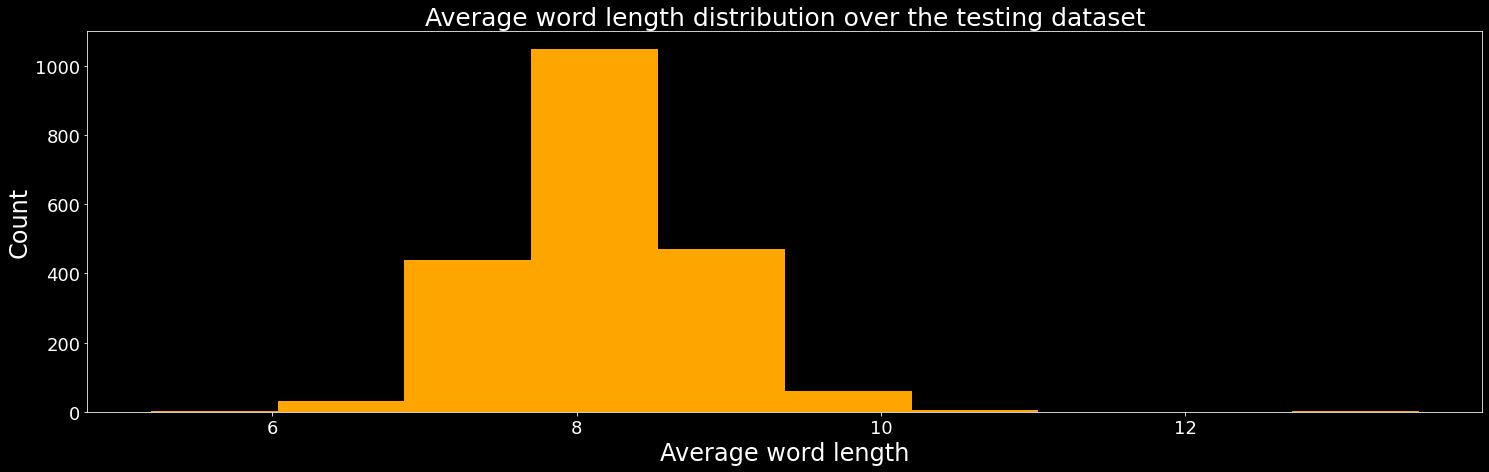

In [24]:
fig_dims = (25, 7)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Average word length distribution over the testing dataset', fontsize=25)
plt.xlabel('Average word length', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18) 
df_test['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(grid=False, color="orange")

__Bi-gram analysis__

In [24]:
train_bigrams = df_train['text'].apply(lambda x: ".".join(str(bigram) for bigram in list(nltk.ngrams(x.split(), 2))))
train_bigram_freq = train_bigrams.str.split(".", expand=True).stack().value_counts()
test_bigrams = df_test['text'].apply(lambda x: ".".join(str(bigram) for bigram in list(nltk.ngrams(x.split(), 2))))
test_bigram_freq = test_bigrams.str.split(".", expand=True).stack().value_counts()
df_train_bigram_freq = pd.DataFrame({'bigrams': train_bigram_freq[:10].index, 'count': train_bigram_freq[:10].values})
df_test_bigram_freq = pd.DataFrame({'bigrams': test_bigram_freq[:10].index, 'count': test_bigram_freq[:10].values})

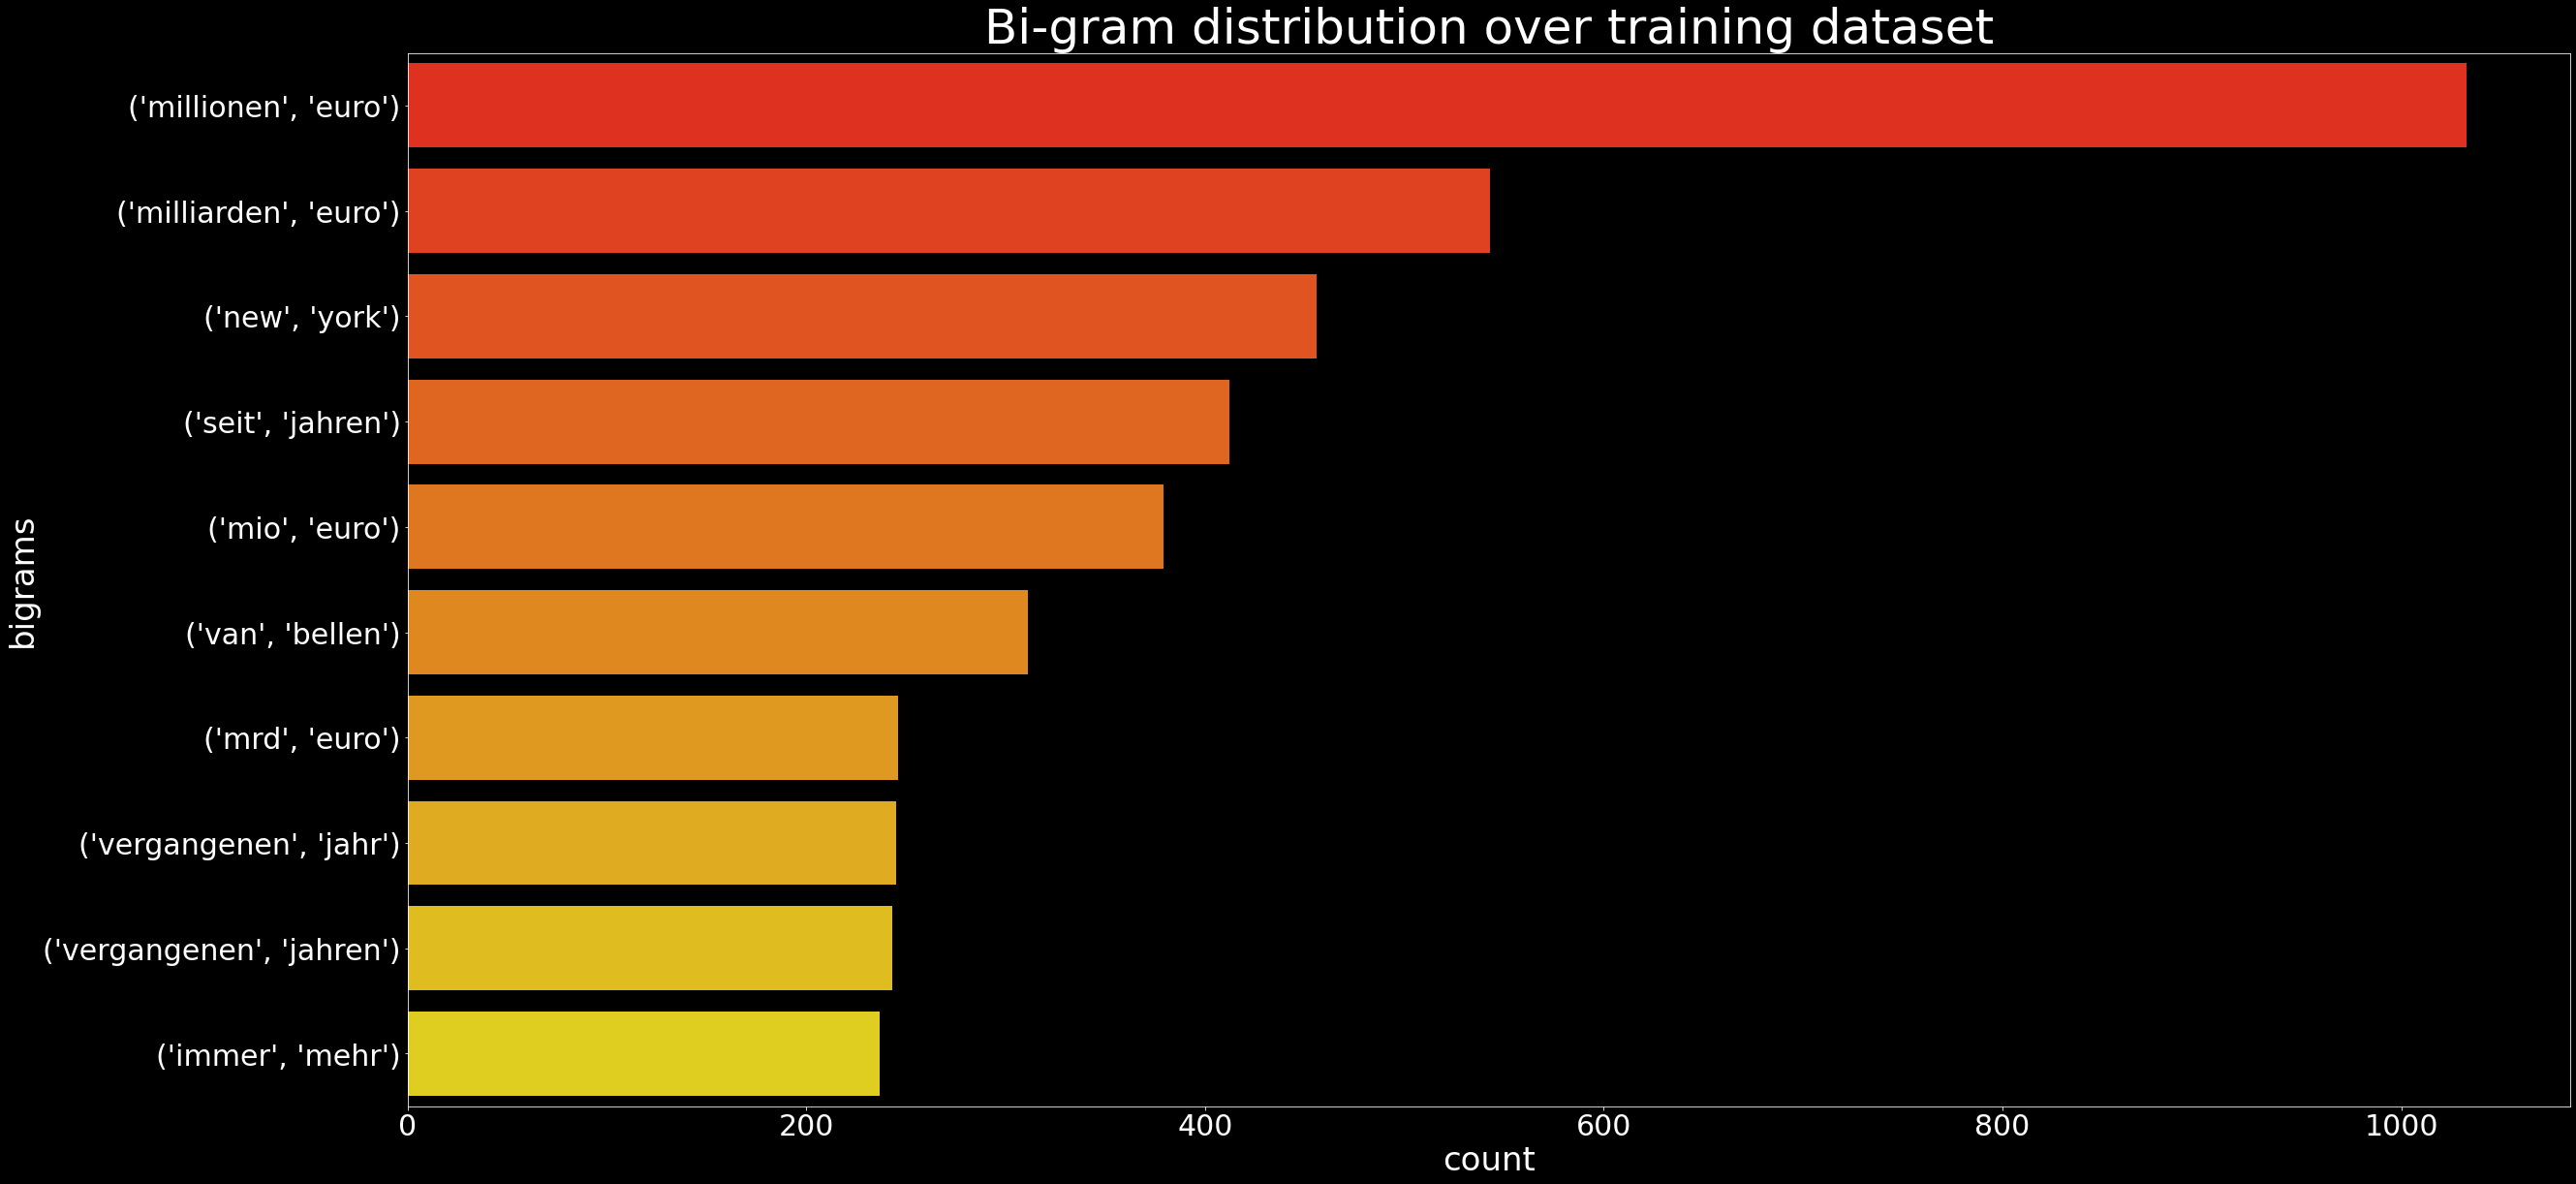

In [25]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Bi-gram distribution over training dataset', fontsize=50)
plt.xlabel('count', fontsize=34)
plt.ylabel('bigrams', fontsize=34)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30) 
ax = sns.barplot(x="count", y="bigrams", data=df_train_bigram_freq, palette=("autumn"))

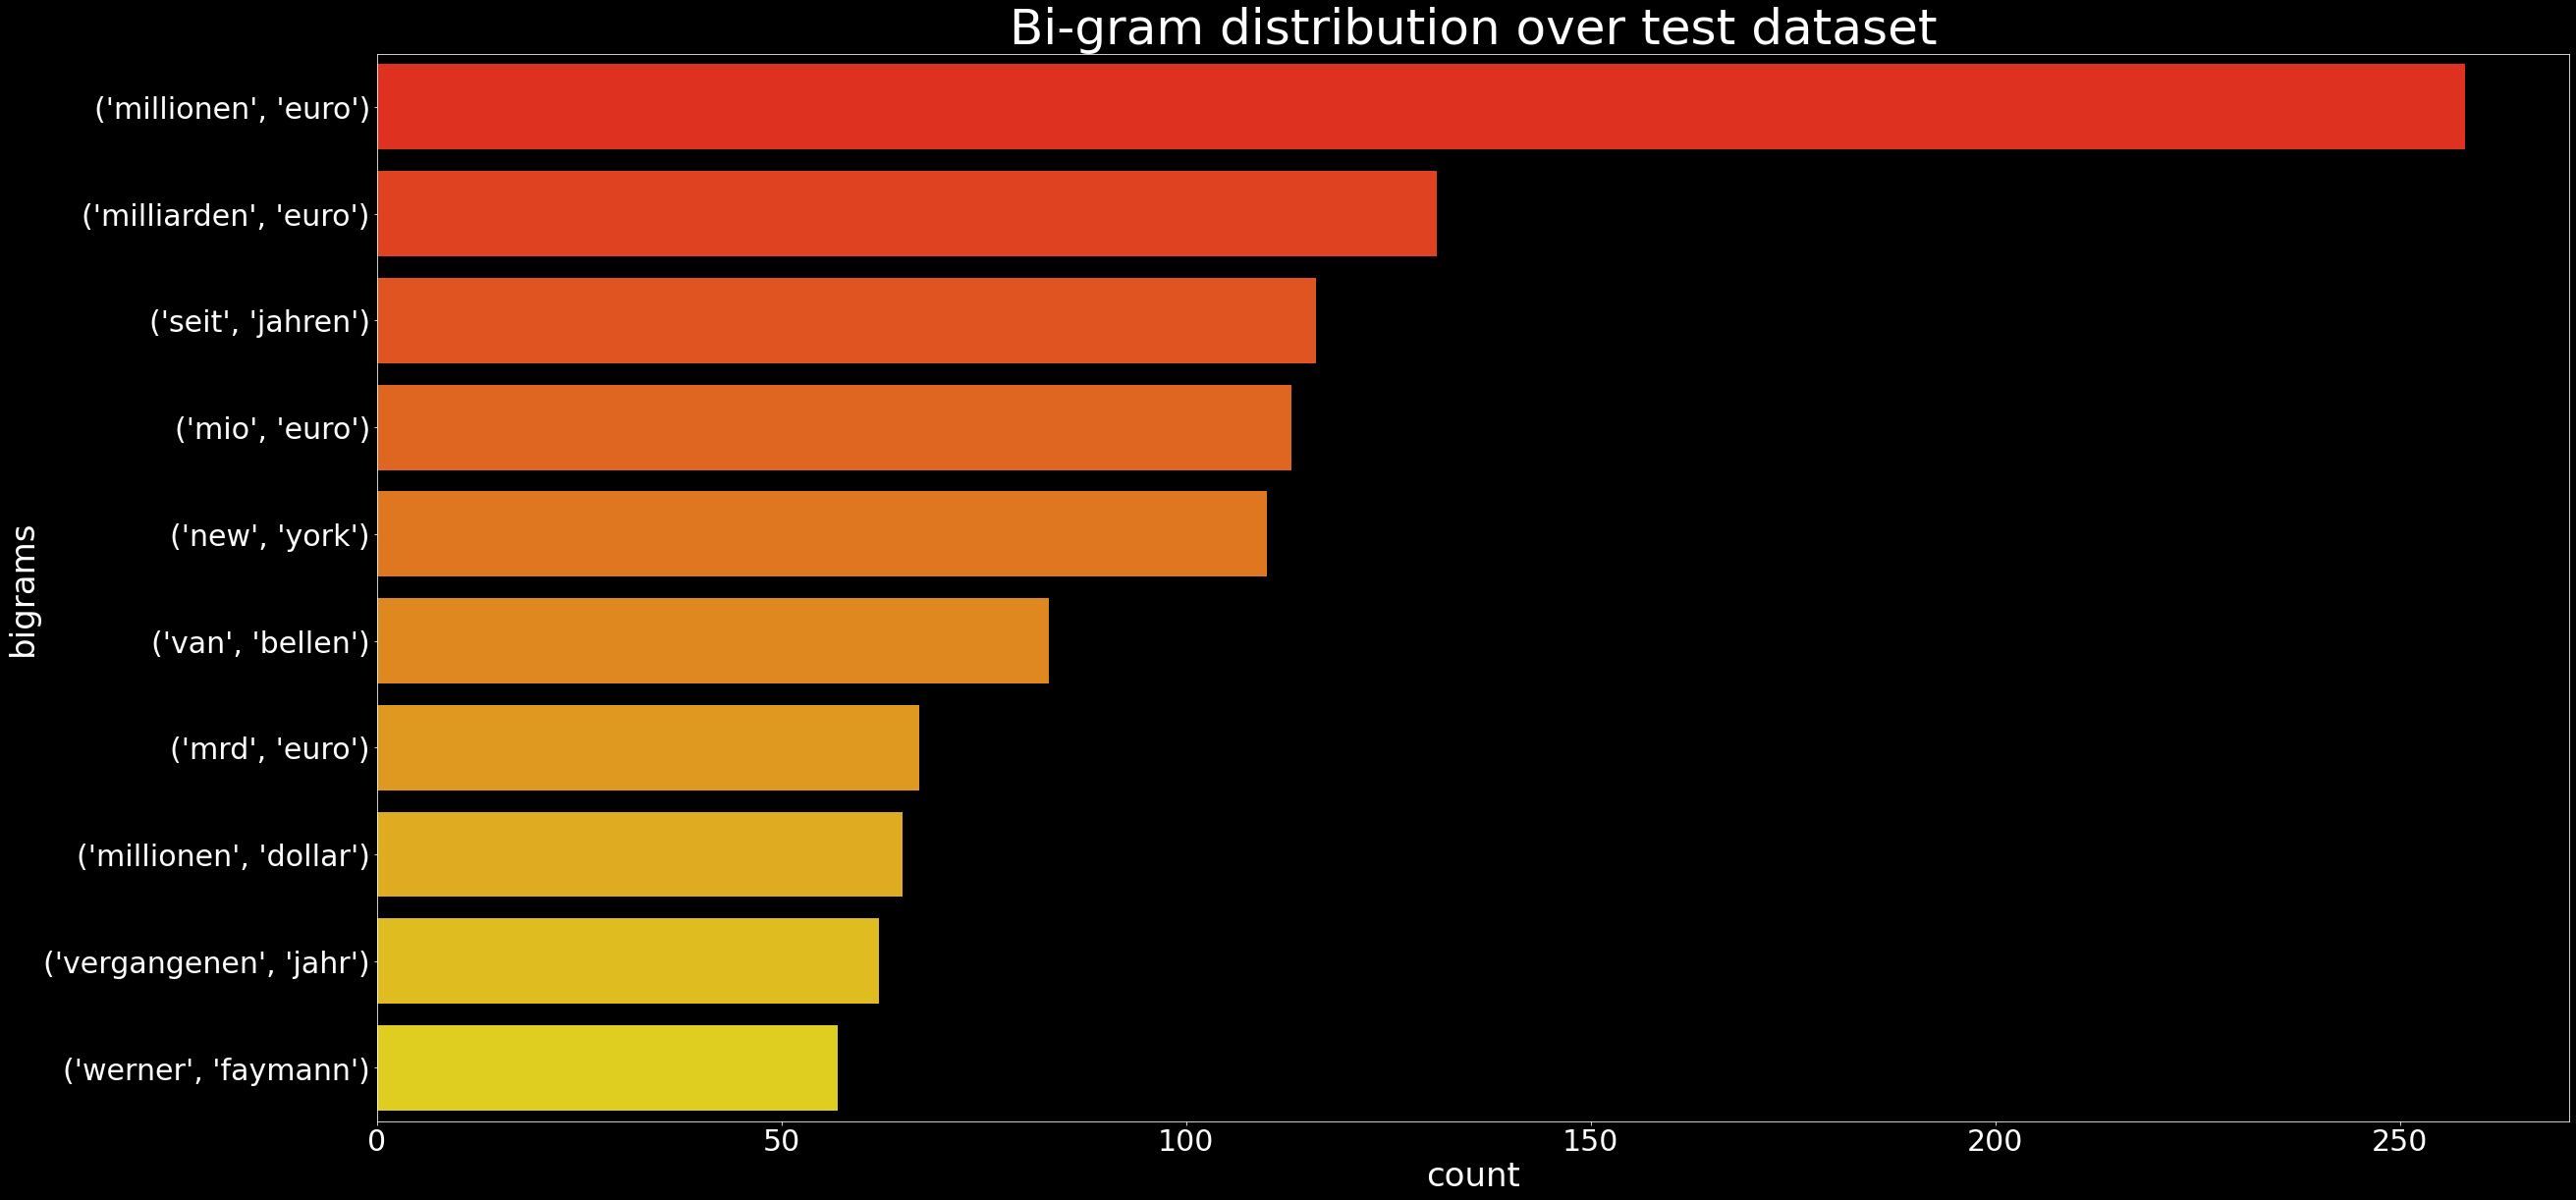

In [26]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Bi-gram distribution over test dataset', fontsize=50)
plt.xlabel('count', fontsize=34)
plt.ylabel('bigrams', fontsize=34)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30) 
ax = sns.barplot(x="count", y="bigrams", data=df_test_bigram_freq, palette=("autumn"))

__Tri-gram analyis__

In [27]:
train_trigrams = df_train['text'].apply(lambda x: ".".join(str(bigram) for bigram in list(nltk.ngrams(x.split(), 3))))
train_trigram_freq = train_trigrams.str.split(".", expand=True).stack().value_counts()
test_trigrams = df_test['text'].apply(lambda x: ".".join(str(bigram) for bigram in list(nltk.ngrams(x.split(), 3))))
test_trigram_freq = test_trigrams.str.split(".", expand=True).stack().value_counts()
df_train_trigram_freq = pd.DataFrame({'trigrams': train_trigram_freq[:10].index, 'count': train_trigram_freq[:10].values})
df_test_trigram_freq = pd.DataFrame({'trigrams': test_trigram_freq[:10].index, 'count': test_trigram_freq[:10].values})

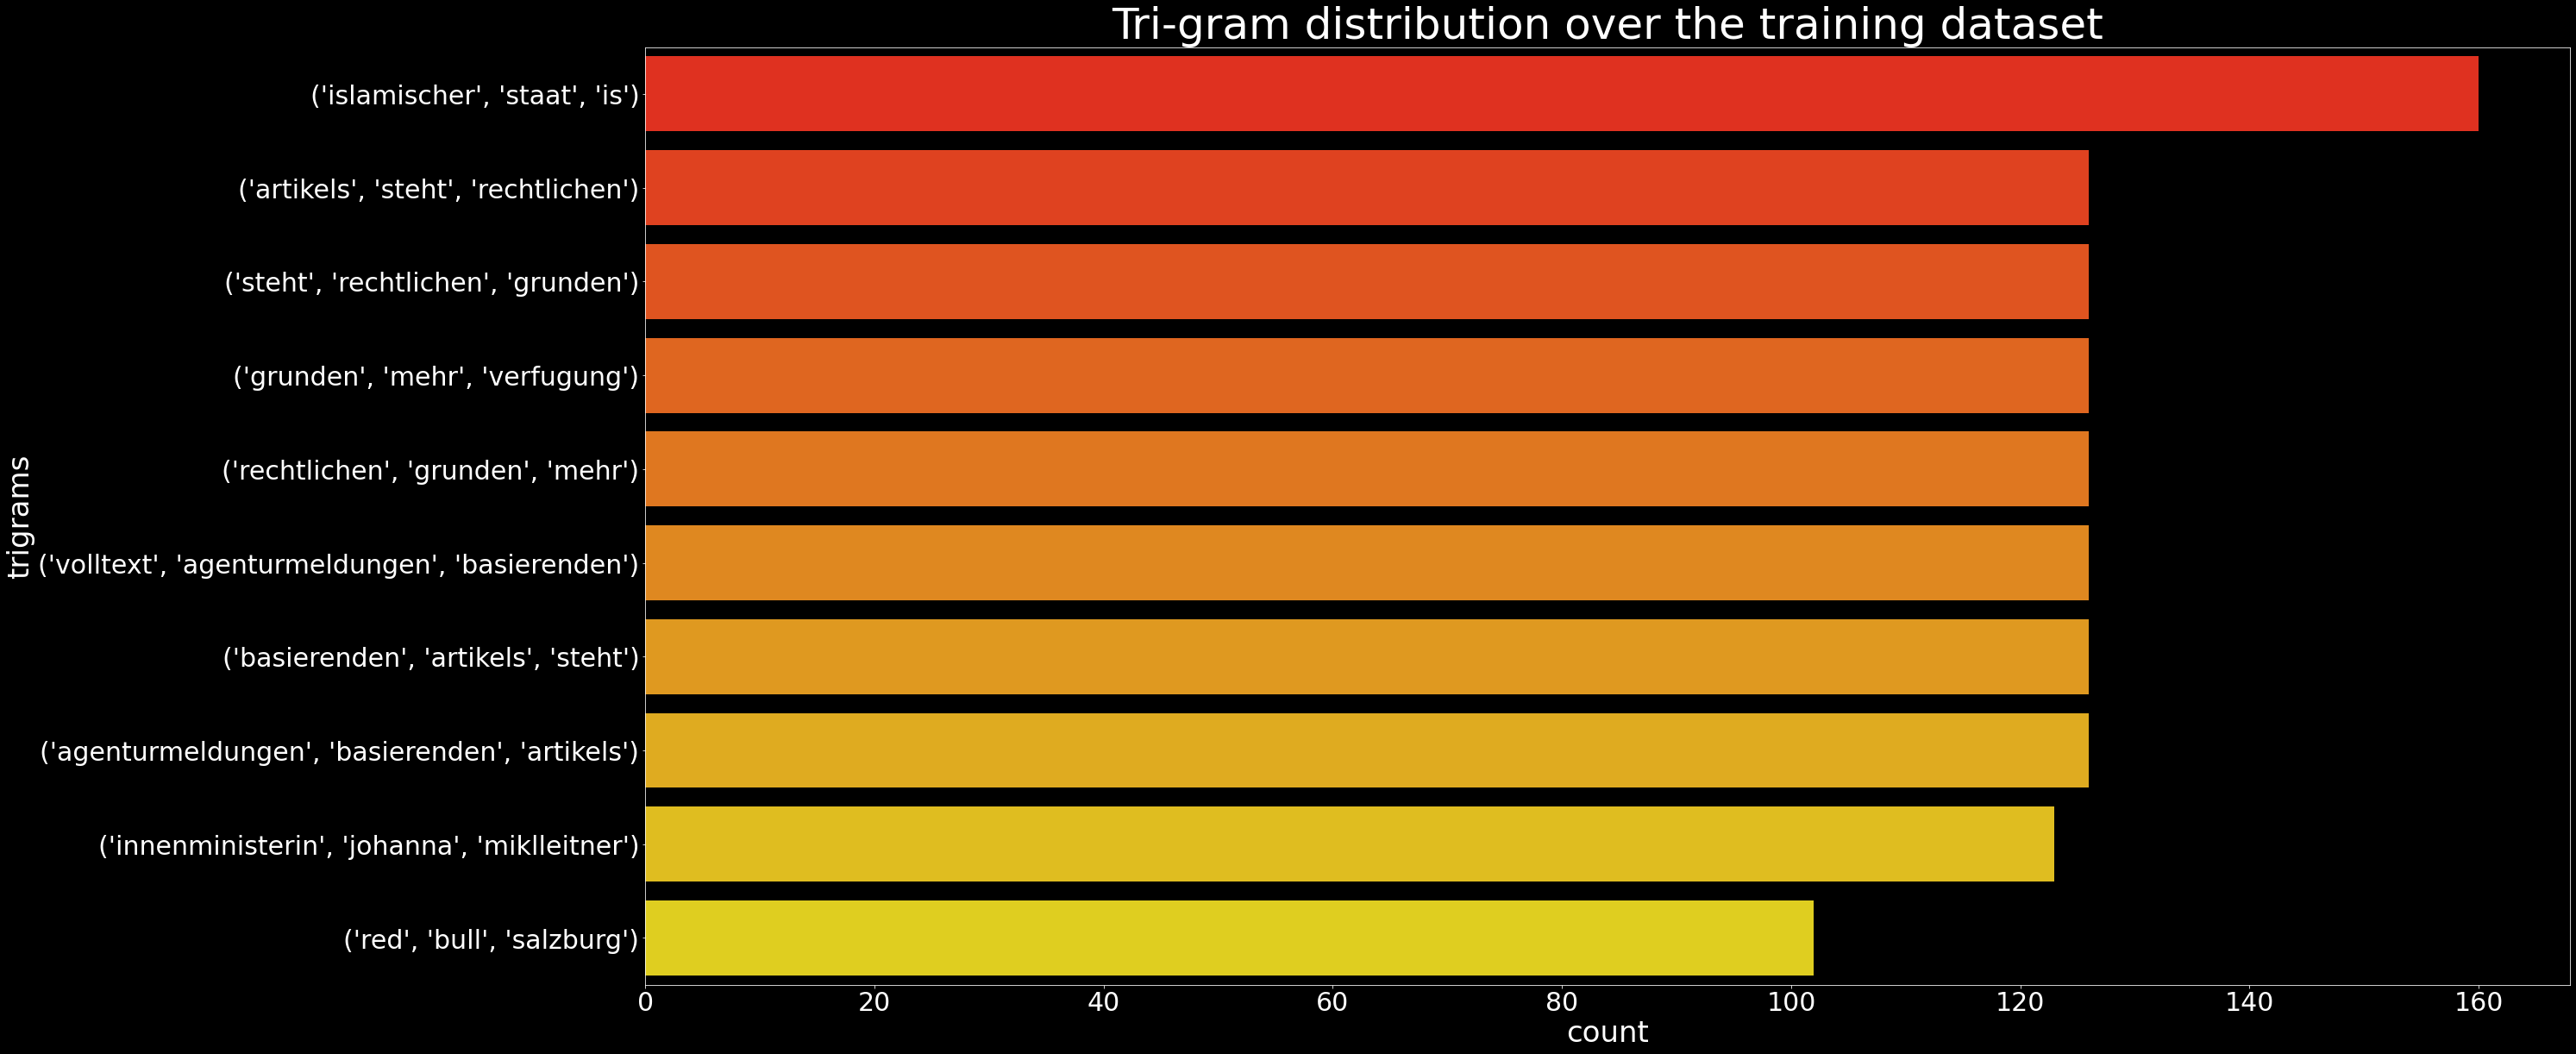

In [28]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Tri-gram distribution over the training dataset', fontsize=50)
plt.xlabel('count', fontsize=34)
plt.ylabel('trigrams', fontsize=34)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30) 
ax = sns.barplot(x="count", y="trigrams", data=df_train_trigram_freq, palette=("autumn"))

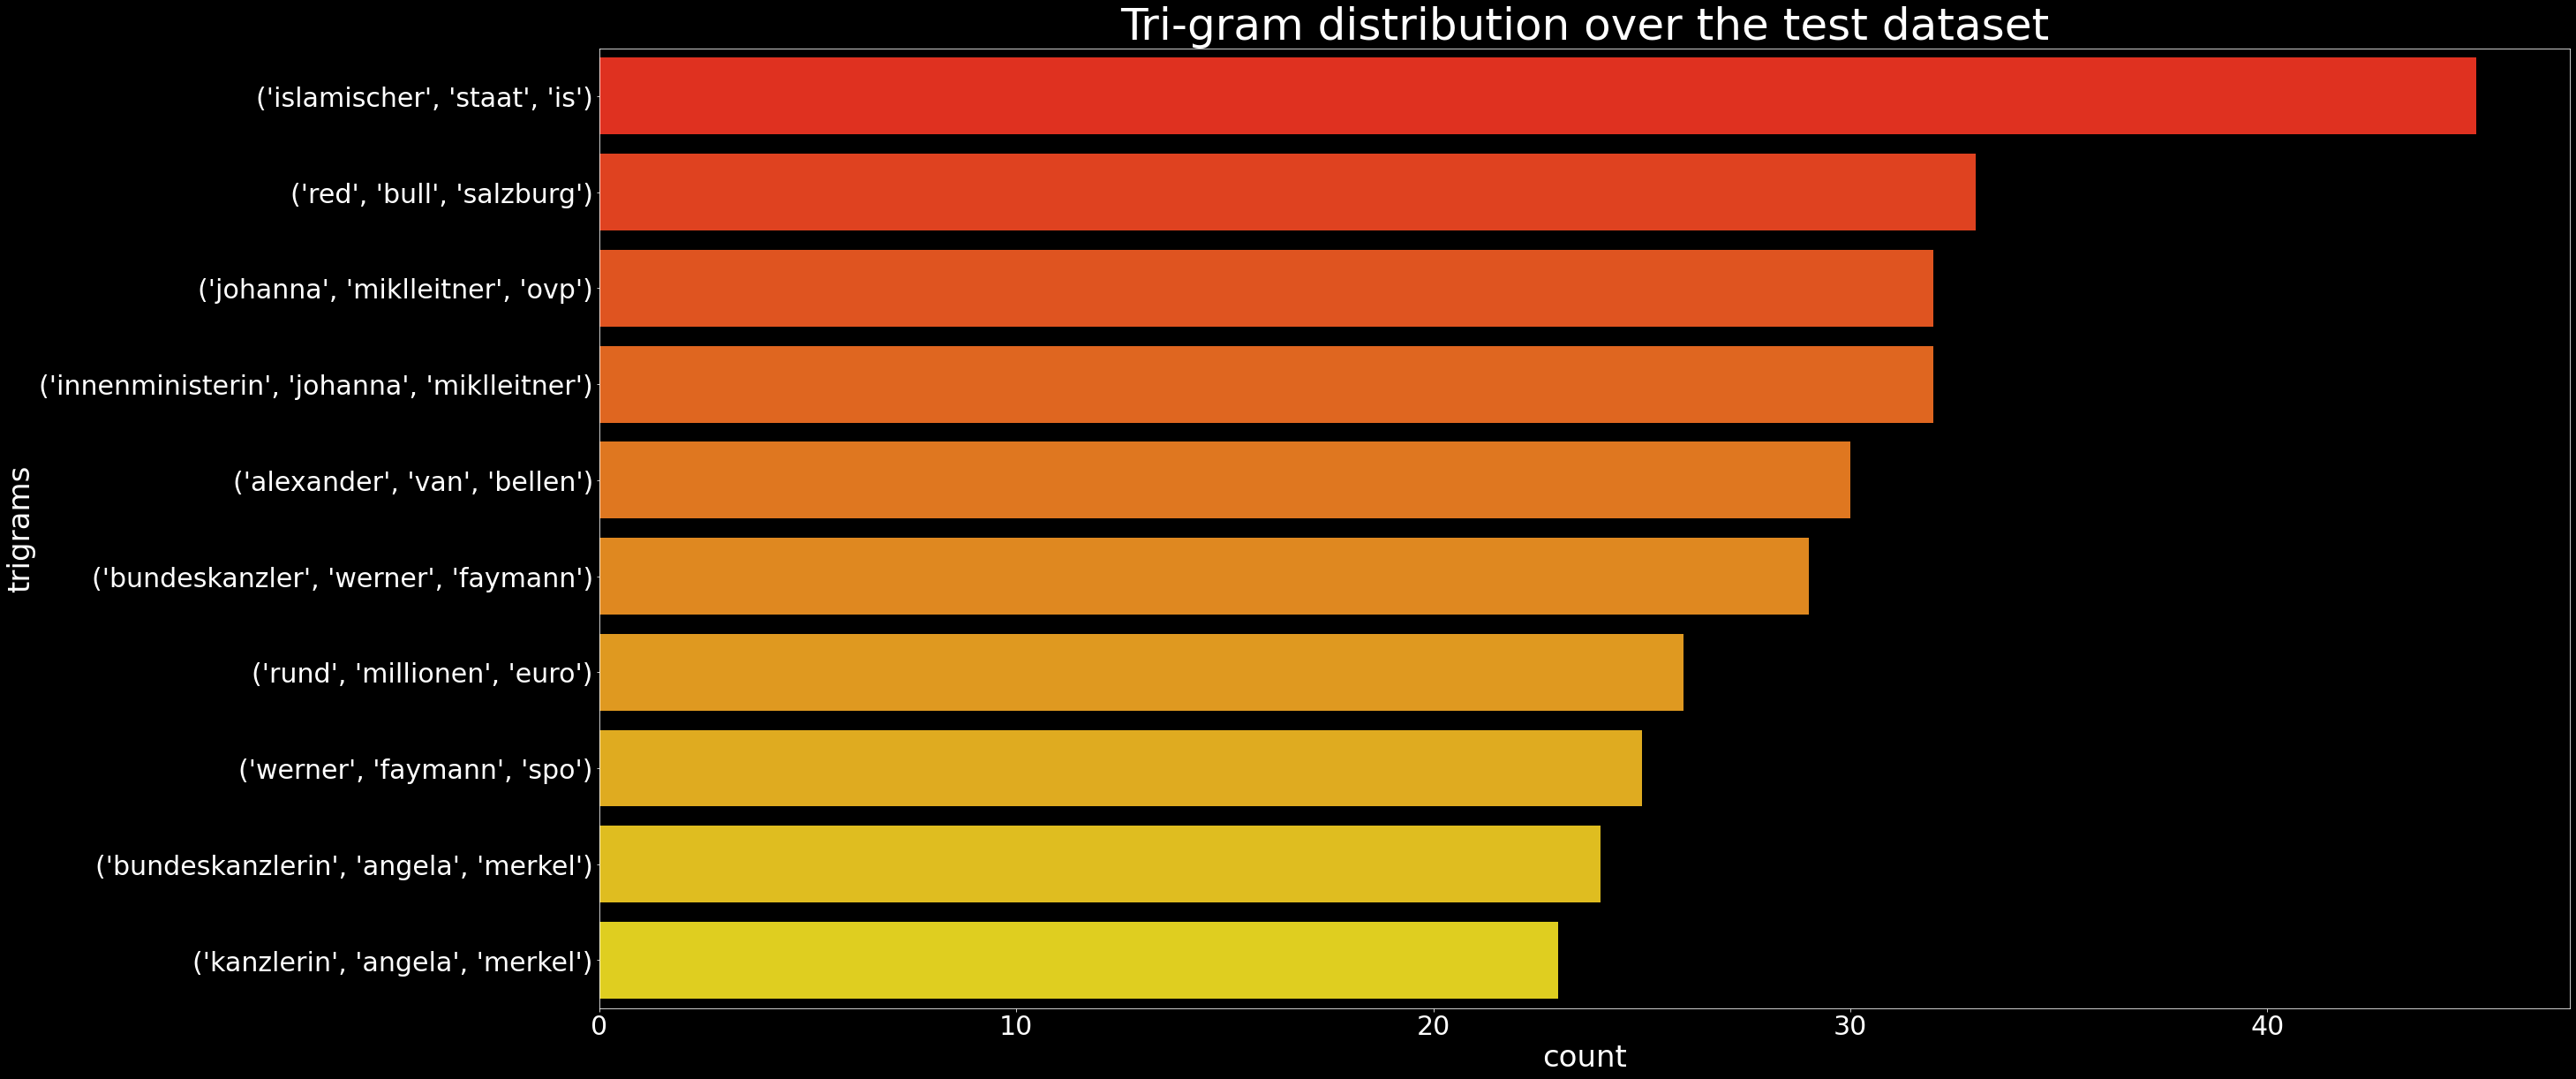

In [29]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title('Tri-gram distribution over the test dataset', fontsize=50)
plt.xlabel('count', fontsize=34)
plt.ylabel('trigrams', fontsize=34)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30) 
ax = sns.barplot(x="count", y="trigrams", data=df_test_trigram_freq, palette=("autumn"))